In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Reshape and normalize the data
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    # Resize to 32x32 (minimum size for VGG16)
    x_train = tf.image.resize(x_train, [32, 32])
    x_test = tf.image.resize(x_test, [32, 32])

    # Convert to RGB (3 channels)
    x_train = tf.image.grayscale_to_rgb(x_train)
    x_test = tf.image.grayscale_to_rgb(x_test)

    # Normalize pixel values to [0,1]
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Convert labels to categorical (one-hot encoding)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [3]:
def create_vgg16_model():
    # Load pre-trained VGG16 without top layers
    base_model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(32, 32, 3))

    # Freeze base model layers (transfer learning)
    base_model.trainable = False

    # Create new model with custom top layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # 10 classes for MNIST
    ])

    return model

In [4]:
def train_model(model, x_train, y_train, x_test, y_test):
    # Compile the model
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    # Print model summary
    model.summary()

    # Train the model
    history = model.fit(x_train, y_train,
                       epochs=5,
                       batch_size=32,
                       validation_data=(x_test, y_test))

    return history


In [5]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
def evaluate_and_predict(model, x_test, y_test):
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")

    # Make predictions
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calculate prediction accuracy
    prediction_accuracy = np.mean(predicted_classes == true_classes)
    print(f"Prediction accuracy: {prediction_accuracy:.4f}")

    return predicted_classes

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8156 - loss: 0.5787 - val_accuracy: 0.9495 - val_loss: 0.1512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9380 - loss: 0.1911 - val_accuracy: 0.9629 - val_loss: 0.1144
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9488 - loss: 0.1553 - val_accuracy: 0.9641 - val_loss: 0.1103
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9540 - loss: 0.1409 - val_accuracy: 0.9702 - val_loss: 0.0904
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9583 - loss: 0.1297 - val_accuracy: 0.9714 - val_loss: 0.0895


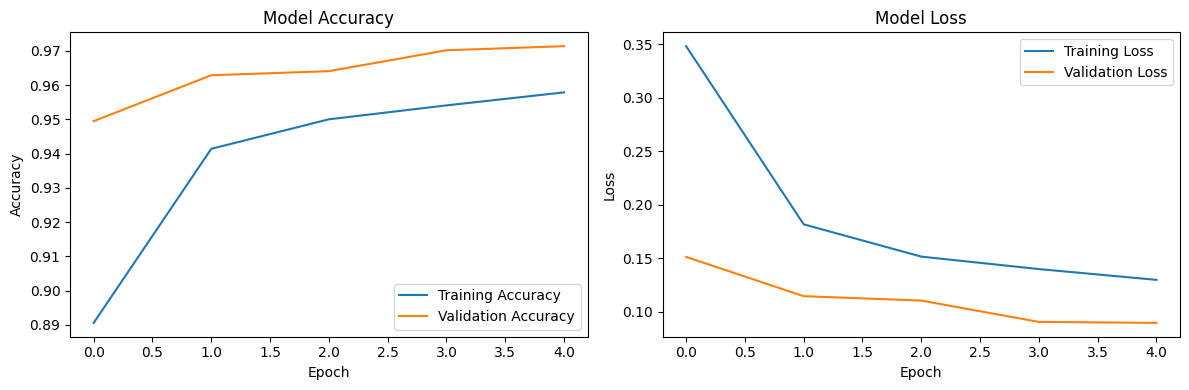

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9683 - loss: 0.0989

Test accuracy: 0.9714
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Prediction accuracy: 0.9714


In [7]:
def main():
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # Create model
    model = create_vgg16_model()

    # Train model
    history = train_model(model, x_train, y_train, x_test, y_test)

    # Plot results
    plot_training_history(history)

    # Evaluate and predict
    predicted_classes = evaluate_and_predict(model, x_test, y_test)

if __name__ == "__main__":
    main()